#HARSH BADHAN
ASSIGNMENT NO 10


In [2]:

import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import string
paragraph = """ My favourite topic is Tech. I watch alot of tech videos on Youtube or browse much more on internet. Tech bar is my favourite Tech Youtuber, I'm following since class ninth. The way of his presenting the content and their editing appeals to me. I wish one day I might make same contribution to their content"""


In [4]:
lower = paragraph.lower()
clean = re.sub(r'[^\w\s]', '', lower)
print(clean)


 my favourite topic is tech i watch alot of tech videos on youtube or browse much more on internet tech bar is my favourite tech youtuber im following since class ninth the way of his presenting the content and their editing appeals to me i wish one day i might make same contribution to their content


In [5]:
sentence = sent_tokenize(paragraph)
print("Sentences:", sentence)

word = word_tokenize(clean)
print("Words:", word)

Sentences: [' My favourite topic is Tech.', 'I watch alot of tech videos on Youtube or browse much more on internet.', "Tech bar is my favourite Tech Youtuber, I'm following since class ninth.", 'The way of his presenting the content and their editing appeals to me.', 'I wish one day I might make same contribution to their content']
Words: ['my', 'favourite', 'topic', 'is', 'tech', 'i', 'watch', 'alot', 'of', 'tech', 'videos', 'on', 'youtube', 'or', 'browse', 'much', 'more', 'on', 'internet', 'tech', 'bar', 'is', 'my', 'favourite', 'tech', 'youtuber', 'im', 'following', 'since', 'class', 'ninth', 'the', 'way', 'of', 'his', 'presenting', 'the', 'content', 'and', 'their', 'editing', 'appeals', 'to', 'me', 'i', 'wish', 'one', 'day', 'i', 'might', 'make', 'same', 'contribution', 'to', 'their', 'content']


In [6]:
splitwords = clean.split()
print("Split words:", splitwords)
tokenwords = word_tokenize(clean)
print("Tokenized words:", tokenwords)

Split words: ['my', 'favourite', 'topic', 'is', 'tech', 'i', 'watch', 'alot', 'of', 'tech', 'videos', 'on', 'youtube', 'or', 'browse', 'much', 'more', 'on', 'internet', 'tech', 'bar', 'is', 'my', 'favourite', 'tech', 'youtuber', 'im', 'following', 'since', 'class', 'ninth', 'the', 'way', 'of', 'his', 'presenting', 'the', 'content', 'and', 'their', 'editing', 'appeals', 'to', 'me', 'i', 'wish', 'one', 'day', 'i', 'might', 'make', 'same', 'contribution', 'to', 'their', 'content']
Tokenized words: ['my', 'favourite', 'topic', 'is', 'tech', 'i', 'watch', 'alot', 'of', 'tech', 'videos', 'on', 'youtube', 'or', 'browse', 'much', 'more', 'on', 'internet', 'tech', 'bar', 'is', 'my', 'favourite', 'tech', 'youtuber', 'im', 'following', 'since', 'class', 'ninth', 'the', 'way', 'of', 'his', 'presenting', 'the', 'content', 'and', 'their', 'editing', 'appeals', 'to', 'me', 'i', 'wish', 'one', 'day', 'i', 'might', 'make', 'same', 'contribution', 'to', 'their', 'content']


In [8]:
stop_words = set(stopwords.words('english'))
filtered = [word for word in tokenwords if word not in stop_words]
print("Filtered Words:", filtered)

Filtered Words: ['favourite', 'topic', 'tech', 'watch', 'alot', 'tech', 'videos', 'youtube', 'browse', 'much', 'internet', 'tech', 'bar', 'favourite', 'tech', 'youtuber', 'im', 'following', 'since', 'class', 'ninth', 'way', 'presenting', 'content', 'editing', 'appeals', 'wish', 'one', 'day', 'might', 'make', 'contribution', 'content']


<Axes: title={'center': 'Word Frequency (without Stopwords)'}, xlabel='Samples', ylabel='Counts'>

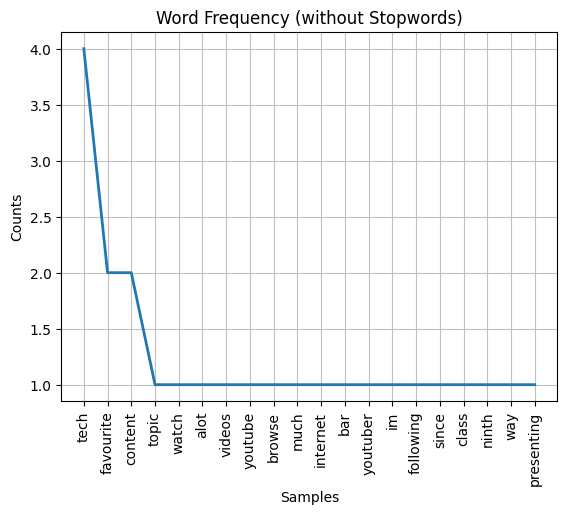

In [9]:
fdist = FreqDist(filtered)
fdist.plot(20, title="Word Frequency (without Stopwords)")


In [10]:
lower = paragraph.lower()
alphabeticwords = re.findall(r'\b[a-zA-Z]+\b',lower)
print("Alphabetic Words:", alphabeticwords)

Alphabetic Words: ['my', 'favourite', 'topic', 'is', 'tech', 'i', 'watch', 'alot', 'of', 'tech', 'videos', 'on', 'youtube', 'or', 'browse', 'much', 'more', 'on', 'internet', 'tech', 'bar', 'is', 'my', 'favourite', 'tech', 'youtuber', 'i', 'm', 'following', 'since', 'class', 'ninth', 'the', 'way', 'of', 'his', 'presenting', 'the', 'content', 'and', 'their', 'editing', 'appeals', 'to', 'me', 'i', 'wish', 'one', 'day', 'i', 'might', 'make', 'same', 'contribution', 'to', 'their', 'content']


In [12]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alphabeticwords if word not in stop_words]
print("Filtered Words:", filtered_words)

Filtered Words: ['favourite', 'topic', 'tech', 'watch', 'alot', 'tech', 'videos', 'youtube', 'browse', 'much', 'internet', 'tech', 'bar', 'favourite', 'tech', 'youtuber', 'following', 'since', 'class', 'ninth', 'way', 'presenting', 'content', 'editing', 'appeals', 'wish', 'one', 'day', 'might', 'make', 'contribution', 'content']


In [13]:
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['favourit', 'topic', 'tech', 'watch', 'alot', 'tech', 'video', 'youtub', 'brows', 'much', 'internet', 'tech', 'bar', 'favourit', 'tech', 'youtub', 'follow', 'sinc', 'class', 'ninth', 'way', 'present', 'content', 'edit', 'appeal', 'wish', 'one', 'day', 'might', 'make', 'contribut', 'content']


In [14]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['favourite', 'topic', 'tech', 'watch', 'alot', 'tech', 'video', 'youtube', 'browse', 'much', 'internet', 'tech', 'bar', 'favourite', 'tech', 'youtuber', 'following', 'since', 'class', 'ninth', 'way', 'presenting', 'content', 'editing', 'appeal', 'wish', 'one', 'day', 'might', 'make', 'contribution', 'content']


In [16]:
texts = [
    "Hi there, today is great weather outside great for completing my today's cardio.",
    "Following Push, Pull, Leg split in gym nowadays.",
    "Alwasys confused which is idle for me cable exercises or dumbel barbell exercises."
]

In [18]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(texts)
print("Vocabulary:", count_vectorizer.get_feature_names_out())
print("Bag of Words Matrix:\n", count_matrix.toarray())


Vocabulary: ['alwasys' 'barbell' 'cable' 'cardio' 'completing' 'confused' 'dumbel'
 'exercises' 'following' 'for' 'great' 'gym' 'hi' 'idle' 'in' 'is' 'leg'
 'me' 'my' 'nowadays' 'or' 'outside' 'pull' 'push' 'split' 'there' 'today'
 'weather' 'which']
Bag of Words Matrix:
 [[0 0 0 1 1 0 0 0 0 1 2 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 2 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 1 1 2 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1]]


In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.         0.         0.         0.24878394 0.24878394 0.
  0.         0.         0.         0.1892066  0.49756788 0.
  0.24878394 0.         0.         0.1892066  0.         0.
  0.24878394 0.         0.         0.24878394 0.         0.
  0.         0.24878394 0.49756788 0.24878394 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.35355339 0.         0.         0.35355339
  0.         0.         0.35355339 0.         0.35355339 0.
  0.         0.35355339 0.         0.         0.35355339 0.35355339
  0.35355339 0.         0.         0.         0.        ]
 [0.26577704 0.26577704 0.26577704 0.         0.         0.26577704
  0.26577704 0.53155409 0.         0.20213029 0.         0.
  0.         0.26577704 0.         0.20213029 0.         0.26577704
  0.         0.         0.26577704 0.         0.         0.
  0.         0.         0.         0.         0.26577704]]


In [20]:
for i in range(len(texts)):
    print(f"\nText {i+1}: {texts[i]}")
    row = tfidf_matrix[i].toarray()[0]
    top_indices = row.argsort()[-3:][::-1]
    for idx in top_indices:
        print(f"   {feature_names[idx]} (Score: {row[idx]:.5f})")


Text 1: Hi there, today is great weather outside great for completing my today's cardio.
   today (Score: 0.49757)
   great (Score: 0.49757)
   there (Score: 0.24878)

Text 2: Following Push, Pull, Leg split in gym nowadays.
   split (Score: 0.35355)
   nowadays (Score: 0.35355)
   leg (Score: 0.35355)

Text 3: Alwasys confused which is idle for me cable exercises or dumbel barbell exercises.
   exercises (Score: 0.53155)
   me (Score: 0.26578)
   or (Score: 0.26578)


In [21]:
text1 = """Augmented Reality blends digital stuff with the real world — like adding virtual objects to your phone camera view. It's used in games, shopping apps, and even in training doctors, making real-world experiences more interactive and fun."""

text2 = """Quantum Computing is a next-gen tech that uses the weird rules of quantum physics to solve problems super fast. Unlike regular computers, it handles crazy complex stuff like drug discovery, weather predictions, and cryptography way more efficiently."""

In [22]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print("Tokens 1:", tokens1)
print("Tokens 2:", tokens2)

Tokens 1: ['augmented', 'reality', 'blends', 'digital', 'stuff', 'real', 'world', 'like', 'adding', 'virtual', 'objects', 'phone', 'camera', 'view', 'used', 'games', 'shopping', 'apps', 'even', 'training', 'doctors', 'making', 'realworld', 'experiences', 'interactive', 'fun']
Tokens 2: ['quantum', 'computing', 'nextgen', 'tech', 'uses', 'weird', 'rules', 'quantum', 'physics', 'solve', 'problems', 'super', 'fast', 'unlike', 'regular', 'computers', 'handles', 'crazy', 'complex', 'stuff', 'like', 'drug', 'discovery', 'weather', 'predictions', 'cryptography', 'way', 'efficiently']


In [23]:
set1 = set(tokens1)
set2 = set(tokens2)

jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", round(jaccard_sim, 3))


Jaccard Similarity: 0.039


In [24]:
review = """The Acer Nitro 5 is a solid budget gaming laptop that delivers decent performance without burning a hole in your pocket. It handles most modern games smoothly on medium to high settings, thanks to its dedicated GPU and fast refresh rate display. The keyboard is comfortable for long sessions, and the design has that gamer vibe without being too flashy. On the flip side, it's a bit bulky, the battery life isn't great, and the fans can get noisy under load. Still, for casual gamers or students on a budget, it’s a pretty sweet deal."""

In [25]:
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

Polarity: 0.17177777777777778
Subjectivity: 0.5582222222222223


In [26]:
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Sentiment:", sentiment)

Sentiment: Positive


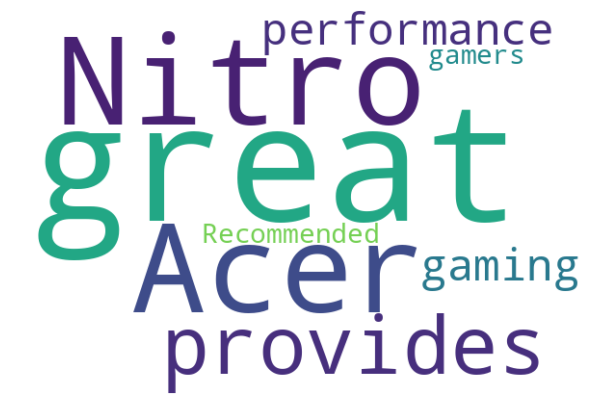

In [29]:
positive_reviews = """Acer Nitro 5 provides a great performance, great for gaming!. Recommended for the gamers."""
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
paragraph = """ My favourite topic is Tech. I watch alot of tech videos on Youtube or browse much more on internet. Tech bar is my favourite Tech Youtuber, I'm following since class ninth. The way of his presenting the content and their editing appeals to me. I wish one day I might make same contribution to their content"""
tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
sequences = []
total_words = len(tokenizer.word_index) + 1

for line in paragraph.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

X = sequences[:, :-1]
y = sequences[:, -1]
y = np.array(y)

In [33]:
model = Sequential()
model.add(Embedding(total_words, 10))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0000e+00 - loss: 3.7632
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0627 - loss: 3.7601 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0940 - loss: 3.7575
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1332 - loss: 3.7556
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1436 - loss: 3.7532 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1462 - loss: 3.7496 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1409 - loss: 3.7435
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0966 - loss: 3.7402 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0835 - loss: 3.7318 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0731 - loss: 3.7232
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0731 - loss: 3.7058
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.

In [36]:
seed_text = "hello hi there"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted)

    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)


hello hi there is is is of tech
